In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
db = pd.read_csv('fraud_dataset.csv')
db.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,5,CASH_OUT,7967.865015,C5193431613,313955.033283,211106.830103,M9188609418,330882.514881,131158.476503,0
1,9,CASH_OUT,677.461280,C6594188834,356695.629711,107334.719635,M7256077908,322424.862791,310481.597047,0
2,7,CASH_OUT,8243.847860,C9566992195,295791.691035,42388.606292,M2569102589,311082.418380,121022.965937,0
3,9,PAYMENT,2831.226524,C7361459580,192487.899920,422583.159518,M8790189499,266873.513255,296815.975700,0
4,8,PAYMENT,16417.470596,C7243664049,414445.114626,383978.183113,M7153749274,439735.220468,191478.320287,0


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


In [4]:
db.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.987720,11821.222685,250216.931029,250023.816990,249085.591550,250126.938170,0.100000
std,2.584329,8593.903870,144425.580899,144175.097501,144398.093940,144615.544423,0.300002
min,1.000000,100.340619,0.302927,10.122197,1.324228,4.844195,0.000000
25%,3.000000,5620.970296,125286.446252,125386.830045,124078.595003,124720.673820,0.000000
50%,5.000000,10915.068416,250264.801143,249753.721283,248833.618849,250708.142417,0.000000
75%,7.000000,16143.312862,375672.286961,374578.639593,374411.633302,375715.280538,0.000000
max,9.000000,49999.255920,499996.110044,499995.230897,499999.137470,499995.871585,1.000000


In [5]:
dataobj = (db.dtypes == 'object')
obj_cols = list(dataobj[dataobj].index)
print("Categorical Variables:",len(obj_cols))

int_ = (db.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Categorical Variables:",len(num_cols),num_cols)

fl_ = (db.dtypes == 'float')
fl_col = list(fl_[fl_].index)
print("float variables:",len(fl_col) , fl_col)

Categorical Variables: 3
Categorical Variables: 2 ['step', 'isFraud']
float variables: 5 ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


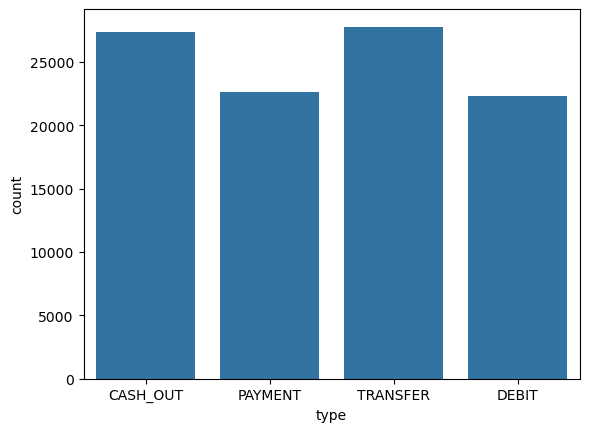

In [6]:
sns.countplot(x='type',data=db)
plt.show()

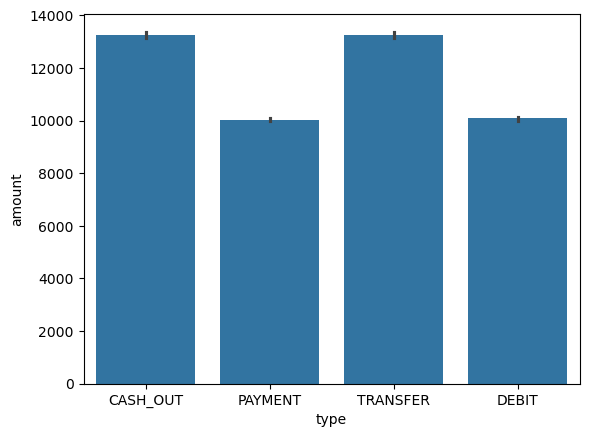

In [7]:
sns.barplot(x='type',y='amount',data=db)
plt.show()

In [8]:
db['isFraud'].value_counts()

isFraud
0    90000
1    10000
Name: count, dtype: int64

<Figure size 1500x600 with 0 Axes>

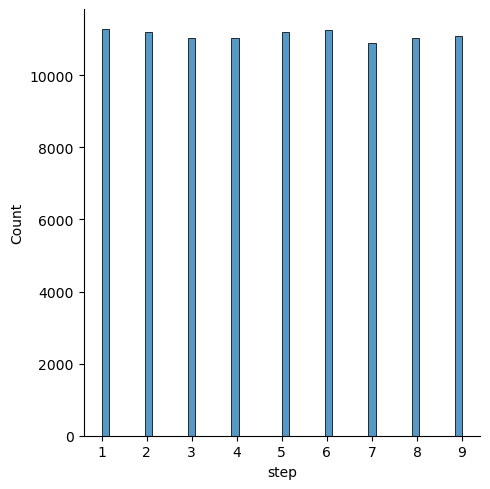

In [9]:
plt.figure(figsize=(15,6))
sns.displot(db['step'],bins=50)
plt.show()

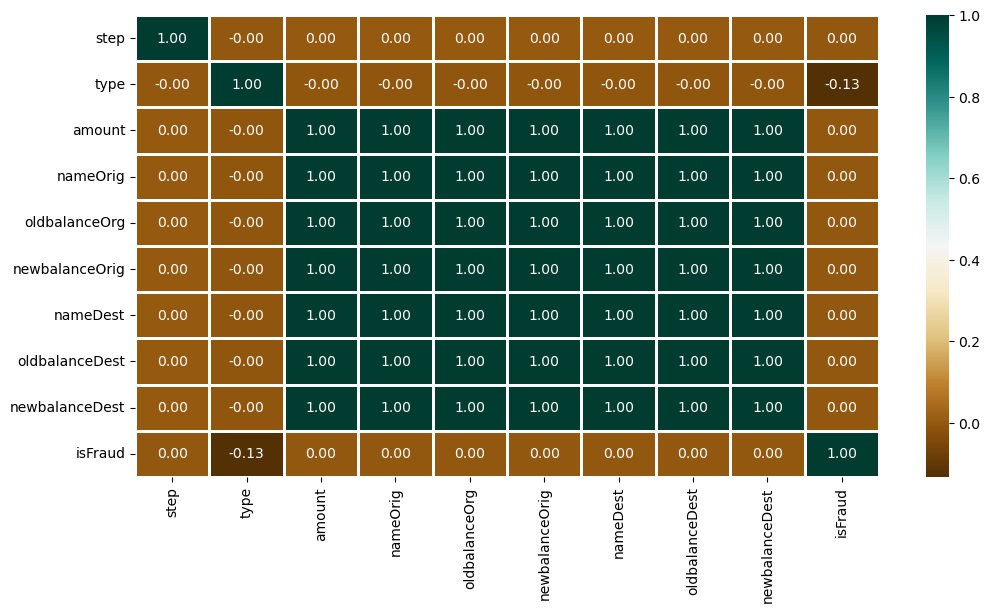

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(db.apply(lambda x:pd.factorize(x)[0]).corr(),
            cmap = 'BrBG',
            fmt='.2f',
            linewidths = 2,
            annot=True)
plt.show()

In [11]:
type_new = pd.get_dummies(db['type'],drop_first=True)
data_new = pd.concat([db,type_new],axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,DEBIT,PAYMENT,TRANSFER
0,5,CASH_OUT,7967.865015,C5193431613,313955.033283,211106.830103,M9188609418,330882.514881,131158.476503,0,False,False,False
1,9,CASH_OUT,677.461280,C6594188834,356695.629711,107334.719635,M7256077908,322424.862791,310481.597047,0,False,False,False
2,7,CASH_OUT,8243.847860,C9566992195,295791.691035,42388.606292,M2569102589,311082.418380,121022.965937,0,False,False,False
3,9,PAYMENT,2831.226524,C7361459580,192487.899920,422583.159518,M8790189499,266873.513255,296815.975700,0,False,True,False
4,8,PAYMENT,16417.470596,C7243664049,414445.114626,383978.183113,M7153749274,439735.220468,191478.320287,0,False,True,False


In [12]:
X = data_new.drop(['isFraud','type','nameOrig','nameDest'],axis=1)
Y=data_new['isFraud']

In [13]:
X.shape , Y.shape

((100000, 9), (100000,))

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.2,random_state=42)

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [16]:
#Model Train
models = [LogisticRegression(),XGBClassifier(),
         RandomForestClassifier(n_estimators=7,
                               criterion='entropy',
                               random_state=7)]
for i in range(len(models)):
    models[i].fit(X_train,Y_train)
    print(f'{models[i]}:')

    train_preds=models[i].predict_proba(X_train)[:,1]
    print('Training Accuracy: ',ras(Y_train,train_preds))

    y_preds = models[i].predict_proba(X_test)[:,1]
    print('Validation Accuracy:' ,ras(Y_test,y_preds))
    print()

C:\Users\oppor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression():
Training Accuracy:  0.9294283594545334
Validation Accuracy: 0.9256538128374104

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Accuracy:  0.9887612657131095
Validation Accuracy: 0.9314314748368949

RandomForestClassifier(criterion='entropy', n_estimators=7,

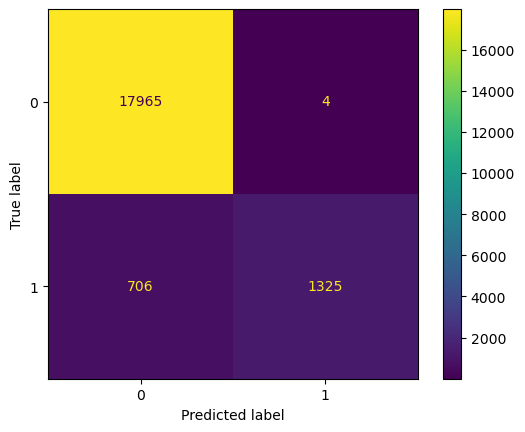

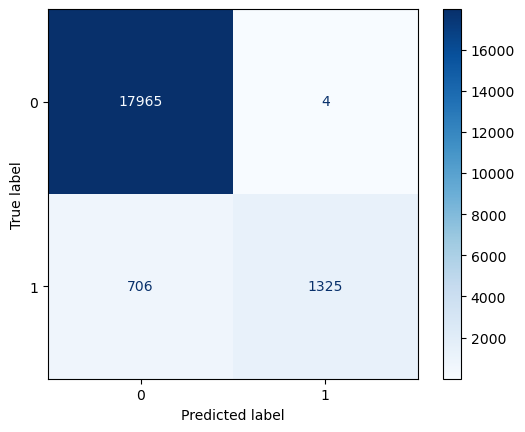

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(models[1],X_test,Y_test)
cm.plot(cmap='Blues')
plt.show()